# Aging Mouse 10x RNA-seq gene expression data (part 1) 

The purpose of this set of notebooks is to provide an overview of the data, the file organization, and how to combine data and metadata through example use cases. 

You need to be connected to the internet to run this notebook or connected to a cache that has the Aging Mouse data downloaded already. 

The notebook presented here shows quick visualizations from precomputed metadata in the atlas. For examples on accessing the expression matrices, specifically selecting genes from expression matrices, see the ``general_acessing_10x_snRNASeq_tutorial.ipynb`` tutorial/example. 

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import anndata
import matplotlib.pyplot as plt

from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

We will interact with the data using the **AbcProjectCache**. This cache object tracks which data has been downloaded and serves the path to the requsted data on disk. For metadata, the cache can also directly serve up a Pandas Dataframe. See the ``getting_started`` notebook for more details on using the cache including installing it if it has not already been. 

**Change the download_base variable to where you have downloaded the data in your system.** 

In [2]:
download_base = Path('../../data/abc_atlas')
abc_cache = AbcProjectCache.from_cache_dir(download_base)

abc_cache.current_manifest

'releases/20241115/manifest.json'

## Data overview 

### Cell metadata 

Essential cell metadata is stored as a DataFrame. Each row represents one cell indexed by a *cell label*. The *cell label* is the concatenation of barcode and name of the sample. In this context, the sample is the *barcoded cell sample* that represents a single load into one port of the 10x Chromium. Note that cell barcodes are only unique within a single *barcoded cell sample* and that the same barcode can be reused. The *barcoded cell sample* label or name is unique in the database. 

Each cell is associated with a *library label*, *library method*, *donor label*, *donor sex*, dissection *region_of_interest_label*, the corresponding coarse *anatomical division label* and the *matrix_prefix* identifying which data package this cell is part of. 

Further, each cell is associated with a *cluster alias* representing which cluster this cell is a member of and (x, y) coordinates of the cells UMAP in [AGING MOUSE UMAP FIGURE]. 

Below, we load the first of the metadata used in this tutorial. This pattern of loading metadata is repeated throughout the tutorials.

In [71]:
abc_cache.list_metadata_files('Zeng-Aging-Mouse-10Xv3')

In [ ]:
abc_cache.list_metadata_files('Zeng-Aging-Mouse-taxonomy')

In [3]:
metadata_base = Path(
    "/allen/programs/celltypes/workgroups/rnaseqanalysis/lydian/mouse_aging_prep/staging/"
    "metadata/Zeng-Aging-Mouse-10Xv3/20241130"
)
taxonomy_base = Path(
    "/allen/programs/celltypes/workgroups/rnaseqanalysis/lydian/mouse_aging_prep/staging/"
    "metadata/Zeng-Aging-Mouse-WMB-taxonomy/20241130"
)

In [4]:
cell = pd.read_csv(metadata_base / 'cell_metadata.csv', dtype={'cell_label': str,
                                                               'wmb_cluster_alias': 'Int64'})
# cell = abc_cache.get_metadata_dataframe(
#    directory='WHB-10Xv3',
#     file_name='cell_metadata',
#     dtype={'cell_label': str,
#            'wmb_cluster_alias': 'Int64'}
# )
cell.set_index('cell_label', inplace=True)
print("Number of cells = ", len(cell))
cell.head()

Number of cells =  1162568


,cell_barcode,gene_count,umi_count,doublet_score,x,y,cluster_alias,cell_in_wmb_study,wmb_cluster_alias,library_label,...,library_in_wmb_study,donor_label,population_sampling,donor_genotype,donor_sex,donor_age,donor_age_category,donor_in_wmb_study,feature_matrix_label,dataset_label
cell_label,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGCACGAT-140_A01,AAACCCAAGGCACGAT,7002,29262,0.29,-11.631238,5.529424,599,True,3537,L8TX_190725_01_A09,...,True,Snap25-IRES2-Cre;Ai14-473981,Snap25+ neurons,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,M,9 wks,adult,True,Zeng-Aging-Mouse-10Xv3,Zeng-Aging-Mouse-10Xv3
AAACCCATCAAATAGG-140_A01,AAACCCATCAAATAGG,6300,22838,0.16,-4.561319,8.795810,425,True,2353,L8TX_190725_01_A09,...,True,Snap25-IRES2-Cre;Ai14-473981,Snap25+ neurons,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,M,9 wks,adult,True,Zeng-Aging-Mouse-10Xv3,Zeng-Aging-Mouse-10Xv3
AAACCCATCTCATGGA-140_A01,AAACCCATCTCATGGA,7260,33630,0.15,-7.981854,9.037793,468,True,4470,L8TX_190725_01_A09,...,True,Snap25-IRES2-Cre;Ai14-473981,Snap25+ neurons,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,M,9 wks,adult,True,Zeng-Aging-Mouse-10Xv3,Zeng-Aging-Mouse-10Xv3
AAACGAAAGCATCTTG-140_A01,AAACGAAAGCATCTTG,3822,12370,0.04,13.590621,1.441468,817,True,5231,L8TX_190725_01_A09,...,True,Snap25-IRES2-Cre;Ai14-473981,Snap25+ neurons,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,M,9 wks,adult,True,Zeng-Aging-Mouse-10Xv3,Zeng-Aging-Mouse-10Xv3
AAACGAAAGCTCCATA-140_A01,AAACGAAAGCTCCATA,6251,22389,0.22,-5.970205,8.956449,421,True,2356,L8TX_190725_01_A09,...,True,Snap25-IRES2-Cre;Ai14-473981,Snap25+ neurons,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,M,9 wks,adult,True,Zeng-Aging-Mouse-10Xv3,Zeng-Aging-Mouse-10Xv3


We can use pandas groupby function to see how many unique items are associated for each field and list them out if the number of items is small.

In [5]:
def print_column_info(df):
    
    for c in df.columns:
        grouped = df[[c]].groupby(c).count()
        members = ''
        if len(grouped) < 30:
            members = str(list(grouped.index))
        print("Number of unique %s = %d %s" % (c, len(grouped), members))

In [6]:
print_column_info(cell)

Number of unique cell_barcode = 997261 
Number of unique gene_count = 9838 
Number of unique umi_count = 81631 
Number of unique doublet_score = 804 
Number of unique x = 1146865 
Number of unique y = 1146953 
Number of unique cluster_alias = 847 
Number of unique cell_in_wmb_study = 2 [False, True]
Number of unique wmb_cluster_alias = 2656 
Number of unique library_label = 284 
Number of unique alignment_job_id = 284 
Number of unique library_method = 2 ['10Xv3', '10xV3.1']
Number of unique barcoded_cell_sample_label = 284 
Number of unique enrichment_population = 6 ['Calcein-positive, Hoechst-positive', 'Hoechst-positive', 'No FACS', 'RFP-positive, Calcein-positive, Hoechst-positive', 'RFP-positive, DAPI-negative', 'RFP-positive, Hoechst-positive']
Number of unique region_of_interest_label = 16 ['HPF - ENT', 'HPF - HIP', 'HPF - PAR-POST-PRE-SUB-ProS', 'HY - HY', 'Iscortex  - ACA', 'Isocortex  - AI', 'Isocortex - PL-ILA-ORB', 'Isocortex - RSP', 'MB - PAG-RAmb', 'MB - VTA-SN', 'P - Pmo

#### Cell metadata colors 

Below we load a DataFrame containing name and color mappings pre-cell for donor sex, region of interest, and anatomical division. This DataFrame is indexed by cell the same as the above cell_metadata. This allows us to label the UMAP with the previously mentioned distinct labels. 

In [7]:
cell_colors = pd.read_csv(
    metadata_base / 'cell_annotation_colors.csv'
).set_index('cell_label')
# mapping_annotations = abc_cache.get_metadata_dataframe(
#     directory='WHB-taxonomy',
#     file_name='cluster_to_cluster_annotation_membership'
# )
cell_colors.head()

,anatomical_division_color,anatomical_division_order,donor_age_category_color,donor_age_category_order,donor_sex_color,donor_sex_order,region_of_interest_color,region_of_interest_order
cell_label,,,,,,,,
AAACCCAAGGCACGAT-140_A01,#FF64FF,5,#9ACA3C,0,#735AA6,1,#FF90FF,12
AAACCCATCAAATAGG-140_A01,#FF64FF,5,#9ACA3C,0,#735AA6,1,#FF90FF,12
AAACCCATCTCATGGA-140_A01,#FF64FF,5,#9ACA3C,0,#735AA6,1,#FF90FF,12
AAACGAAAGCATCTTG-140_A01,#FF64FF,5,#9ACA3C,0,#735AA6,1,#FF90FF,12
AAACGAAAGCTCCATA-140_A01,#FF64FF,5,#9ACA3C,0,#735AA6,1,#FF90FF,12


### Cluster information 

#### Cell to Cluster mapping 

One of the more important metadata is the mapping of all cells to the clusters and above levels in the taxonomy hierarchy. This includes all names and colors for each part of the taxonomy. As show in the cluster annotation tutorial for this dataset, each cluster in the Aging Dataset is nested within a supertype from the WMB dataset allowing one to walk all the way up to the class level from WMB. 

In [8]:
cluster_mapping = pd.read_csv(
    taxonomy_base / 'cell_cluster_mapping_annotations.csv'
).set_index('cell_label')
# mapping_annotations = abc_cache.get_metadata_dataframe(
#     directory='WHB-taxonomy',
#     file_name='cluster_to_cluster_annotation_membership'
# )
cluster_mapping.head()

,cluster_alias,cluster_label,cluster_order,cluster_name,cluster_color,class_name,subclass_name,supertype_name,class_color,subclass_color,supertype_color
cell_label,,,,,,,,,,,
AAACCCAAGGCACGAT-140_A01,599,CS20241021_0599,598,599_SC-PAG Lef1 Emx2 Gaba_2,#6daa25,20 MB GABA,205 SC-PAG Lef1 Emx2 Gaba,0844 SC-PAG Lef1 Emx2 Gaba_2,#9EF01A,#4D79FF,#173A99
AAACCCATCAAATAGG-140_A01,425,CS20241021_0425,424,425_IF-RL-CLI-PAG Foxa1 Glut_4,#f1212a,19 MB Glut,159 IF-RL-CLI-PAG Foxa1 Glut,0688 IF-RL-CLI-PAG Foxa1 Glut_4,#007200,#63FF26,#CD99FF
AAACCCATCTCATGGA-140_A01,468,CS20241021_0468,467,468_PAG-MRN Tfap2b Glut_1,#7ae5a5,19 MB Glut,170 PAG-MRN Tfap2b Glut,0733 PAG-MRN Tfap2b Glut_1,#007200,#82995C,#2A1FCC
AAACGAAAGCATCTTG-140_A01,817,CS20241021_0817,816,817_MOL NN_4,#d87c9f,31 OPC-Oligo,327 Oligo NN,1184 MOL NN_4,#03045E,#99FFBC,#99CAFF
AAACGAAAGCTCCATA-140_A01,421,CS20241021_0421,420,421_IF-RL-CLI-PAG Foxa1 Glut_2,#ea9fd7,19 MB Glut,159 IF-RL-CLI-PAG Foxa1 Glut,0686 IF-RL-CLI-PAG Foxa1 Glut_2,#007200,#63FF26,#99004E


#### Cluster information 

Finally, we load information on the individual clusters including the age ratio, odds, and neurotransmitter information. This metadata is indexed on cluster_alias which is also a column in the cell_metadata that allows us to merge the information into that DataFrame. 

In [9]:
cluster_info = pd.read_csv(
    metadata_base / 'cluster.csv'
).set_index('cluster_alias')
# mapping_annotations = abc_cache.get_metadata_dataframe(
#     directory='WHB-taxonomy',
#     file_name='cluster_to_cluster_annotation_membership'
# )
cluster_info

,number_of_cells,cluster_label,cluster_order,cluster_name,cluster_color,number_of_adult_cells,number_of_aged_cells,proportion_adult_cells,proportion_aged_cells,odds_ratio,log2_odds_ratio,cluster_age_bias,cluster_age_bias_color,neurotransmitter_combined_label,neurotransmitter_label,neurotransmitter_color
cluster_alias,,,,,,,,,,,,,,,,
1,851,CS20241021_0001,0,1_CLA-EPd-CTX Car3 Glut_1,#f7c27a,183,668,0.215041,0.784959,1.453797,0.539826,unassigned,#DADEDF,Glut,Glut,#2B93DF
2,330,CS20241021_0002,1,2_IT EP-CLA Glut_1,#5c1a34,160,170,0.484848,0.515152,0.421595,-1.246071,unassigned,#DADEDF,Glut,Glut,#2B93DF
3,589,CS20241021_0003,2,3_IT EP-CLA Glut_1,#b96cf0,240,349,0.407470,0.592530,0.576896,-0.793616,unassigned,#DADEDF,Glut,Glut,#2B93DF
4,207,CS20241021_0004,3,4_IT EP-CLA Glut_1,#bff691,107,100,0.516908,0.483092,0.371035,-1.430373,unassigned,#DADEDF,Glut,Glut,#2B93DF
5,2141,CS20241021_0005,4,5_IT EP-CLA Glut_1,#39fbfa,655,1486,0.305932,0.694068,0.900735,-0.150825,unassigned,#DADEDF,Glut,Glut,#2B93DF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,2640,CS20241021_0843,842,843_Microglia NN_1,#a88b30,71,2569,0.026894,0.973106,20.304439,4.343723,aging-enriched,#CD6828,No-NT,No-NT,#666666
844,771,CS20241021_0844,843,844_Microglia NN_1,#df92c3,284,487,0.368353,0.631647,0.911851,-0.133131,unassigned,#DADEDF,No-NT,No-NT,#666666
845,3030,CS20241021_0845,844,845_BAM NN_1,#a1adea,1462,1568,0.482508,0.517492,0.556218,-0.846279,unassigned,#DADEDF,No-NT,No-NT,#666666


### Joining the data 

Now that we have our data loaded and indexed, we can merge the tables together to create a single DataFrame allowing us to plot various information onto the UMAP and beyond. 

In [10]:
# Join on the cell_label index.
cell_extended = cell.join(cluster_mapping, rsuffix='_cl_map')
cell_extended = cell_extended.join(cell_colors, rsuffix='_cl_colors')
# Join the cluster information in by joining on the Aging dataset's cluster_alias column.
cell_extended = cell_extended.join(cluster_info, on='cluster_alias', rsuffix='_cl_info')

# Quick run through to drop duplicated columns
drop_cols = []
for col in cell_extended.columns:
    if col.endswith(('_cl_map', '_cl_colors', '_cl_info')):
        drop_cols.append(col)
cell_extended.drop(columns=drop_cols, inplace=True)

# The dataset is sorted on cell_label by default, this causes some plotting weirdness
# due to all "adult" cells being first in the order. Below we scrabble the DataFrame
# to better reproduce plots from the paper.
cell_extended = cell_extended.sample(frac=1, random_state=12345)
cell_extended.head()

,cell_barcode,gene_count,umi_count,doublet_score,x,y,cluster_alias,cell_in_wmb_study,wmb_cluster_alias,library_label,...,number_of_aged_cells,proportion_adult_cells,proportion_aged_cells,odds_ratio,log2_odds_ratio,cluster_age_bias,cluster_age_bias_color,neurotransmitter_combined_label,neurotransmitter_label,neurotransmitter_color
cell_label,,,,,,,,,,,,,,,,,,,,,
TCTGTCGAGGGACACT-149_C01,TCTGTCGAGGGACACT,7999,38882,0.121951,-5.924914,14.984385,653,True,3017,L8TX_190822_01_A11,...,98,0.733696,0.266304,0.394921,-1.340363,unassigned,#DADEDF,Glut,Glut,#2B93DF
AAGAACAGTGCAACAG-376_D05,AAGAACAGTGCAACAG,3394,7929,0.100000,6.513575,12.252954,782,False,<NA>,L8TX_201001_01_C08,...,70679,0.382603,0.617397,0.901961,-0.148863,unassigned,#DADEDF,No-NT,No-NT,#666666
GGAACCCAGCTAGTTC-384_D05,GGAACCCAGCTAGTTC,5023,17205,0.080000,-13.623771,12.990168,768,False,<NA>,L8TX_201009_01_B01,...,169,0.592771,0.407229,0.665383,-0.587744,unassigned,#DADEDF,GABA,GABA,#FF3358
AAAGGTAGTTCACCGG-407_B02,AAAGGTAGTTCACCGG,3087,8554,0.000000,13.269343,0.800345,817,True,5231,L8TX_201029_01_B10,...,64829,0.454494,0.545506,1.046448,0.065500,unassigned,#DADEDF,No-NT,No-NT,#666666
ACATCGATCATGGATC-134_A01,ACATCGATCATGGATC,4509,20201,0.020000,0.676959,2.628165,270,True,1070,L8TX_190716_01_H07,...,183,0.498630,0.501370,1.394808,0.480066,unassigned,#DADEDF,GABA,GABA,#FF3358


Finally, let's take a look at the coluns and unique data from our final dataframe.

In [11]:
print_column_info(cell_extended)

Number of unique cell_barcode = 997261 
Number of unique gene_count = 9838 
Number of unique umi_count = 81631 
Number of unique doublet_score = 804 
Number of unique x = 1146865 
Number of unique y = 1146953 
Number of unique cluster_alias = 847 
Number of unique cell_in_wmb_study = 2 [False, True]
Number of unique wmb_cluster_alias = 2656 
Number of unique library_label = 284 
Number of unique alignment_job_id = 284 
Number of unique library_method = 2 ['10Xv3', '10xV3.1']
Number of unique barcoded_cell_sample_label = 284 
Number of unique enrichment_population = 6 ['Calcein-positive, Hoechst-positive', 'Hoechst-positive', 'No FACS', 'RFP-positive, Calcein-positive, Hoechst-positive', 'RFP-positive, DAPI-negative', 'RFP-positive, Hoechst-positive']
Number of unique region_of_interest_label = 16 ['HPF - ENT', 'HPF - HIP', 'HPF - PAR-POST-PRE-SUB-ProS', 'HY - HY', 'Iscortex  - ACA', 'Isocortex  - AI', 'Isocortex - PL-ILA-ORB', 'Isocortex - RSP', 'MB - PAG-RAmb', 'MB - VTA-SN', 'P - Pmo

## UMAP spatial embedding 

Now that we've merged the cluster metadata into the main cells data, we can plot the Uniform Manifold Approximation and Projection (UMAP) for all the cells in the dataset using information from the clusters. The UMAP is a dimension reduction technique that can be used for visualizing and exploring large-dimension datasets. The x, y columns of the cell metadata table represent the coordinate of all cells in the UMAP in Figure [GET NEW CITE] of the manuscript. 

We define a small helper function *plot umap* to visualize the cells on the UMAP. In this example will plot associated cell information colorized by dissection region of interest, neurotransmitter identity, sex, taxonomy level, age category, and age depletion/enrichment. 

In [12]:
def plot_umap(xx, yy, cc=None, val=None, fig_width=8, fig_height=8, cmap=None, labels=None):

    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height)

    if cmap is not None:
        scatt = ax.scatter(xx, yy, c=val, s=0.5, marker='.', cmap=cmap)
    elif cc is not None:
        scatt = ax.scatter(xx, yy, c=cc, s=0.5, marker='.')

    if labels is not None:
        from matplotlib.patches import Rectangle
        unique_colors = cc.unique()
        rects = []
        for color in unique_colors:
            rects.append(Rectangle((0, 0), 1, 1, fc=color))

        legend = ax.legend(rects, labels, loc=0)
        # ax.add_artist(legend)

    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig, ax

### Donor and anatomic information 

Below we plot the UMAPS for each of anatomical division, dissection, and sex. 

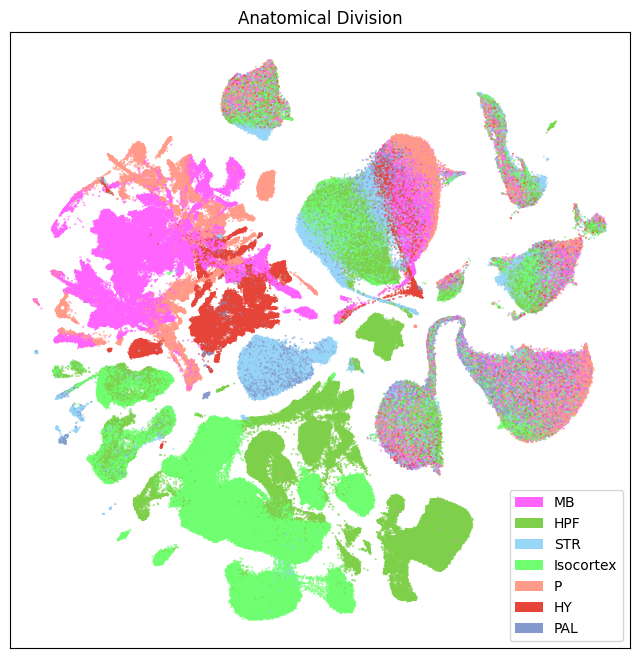

In [13]:
fig, ax = plot_umap(
    cell_extended['x'],
    cell_extended['y'],
    cc=cell_extended['anatomical_division_color'],
    labels=cell_extended['anatomical_division_label'].unique()
)
res = ax.set_title("Anatomical Division")
plt.show()

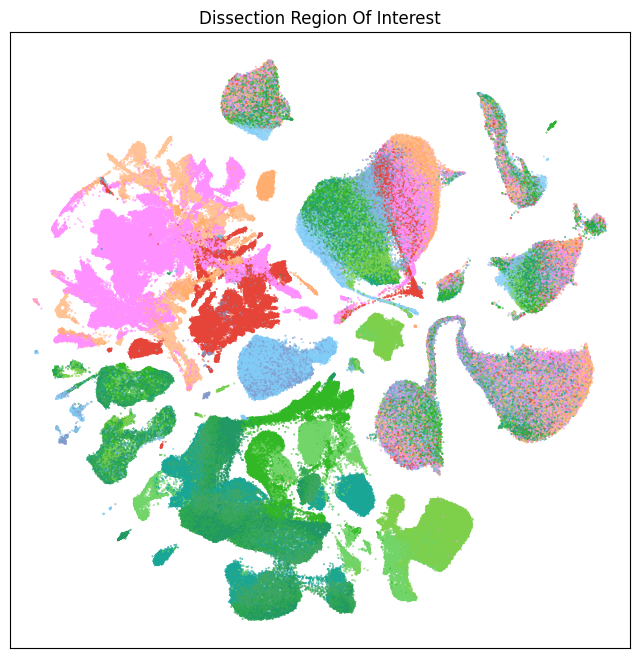

In [14]:
fig, ax = plot_umap(
    cell_extended['x'],
    cell_extended['y'],
    cc=cell_extended['region_of_interest_color']
)
res = ax.set_title("Dissection Region Of Interest")
plt.show()

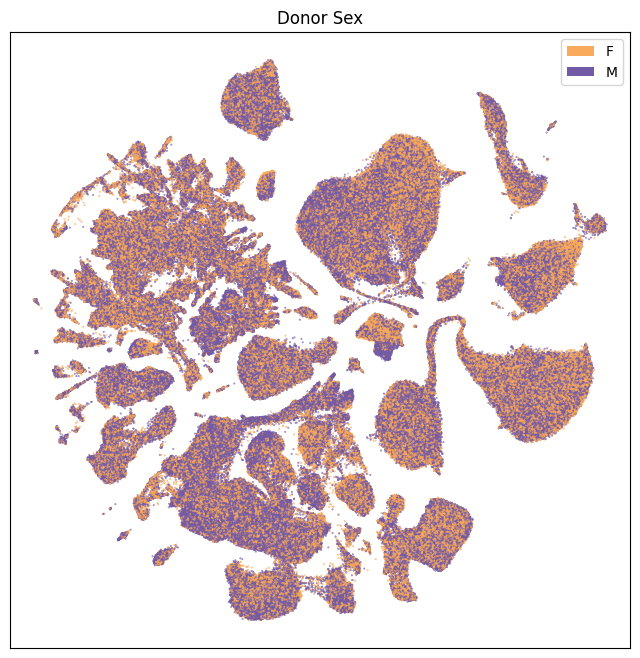

In [15]:
fig, ax = plot_umap(
    cell_extended['x'],
    cell_extended['y'],
    cc=cell_extended['donor_sex_color'],
    labels=cell_extended['donor_sex'].unique()
)
res = ax.set_title("Donor Sex")
plt.show()

### Taxonomy information

Below are UMAPs for labels associated with the taxonomy, namely: neurotransmitter and taxonomy class, subclass, supertype, and cluster. Note that the colors for neurotransmitter, class, subclass, and supertype are the same as those from the WMB taxonomy.

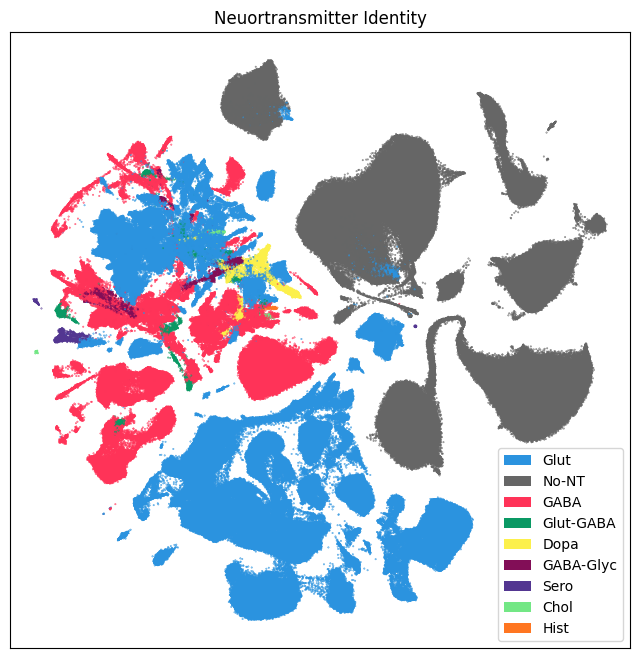

In [16]:
fig, ax = plot_umap(
    cell_extended['x'],
    cell_extended['y'],
    cc=cell_extended['neurotransmitter_color'],
    labels=cell_extended['neurotransmitter_label'].unique()
)
res = ax.set_title("Neuortransmitter Identity")
plt.show()

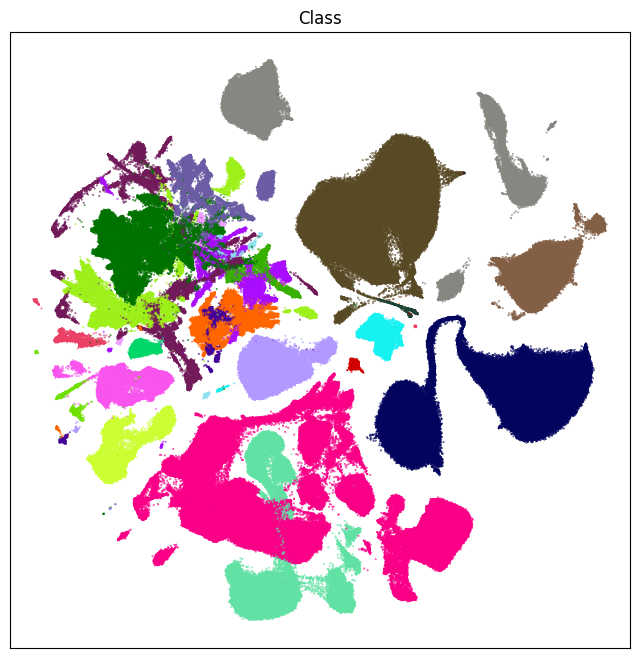

In [17]:
fig, ax = plot_umap(cell_extended['x'], cell_extended['y'], cc=cell_extended['class_color'])
res = ax.set_title("Class")
plt.show()

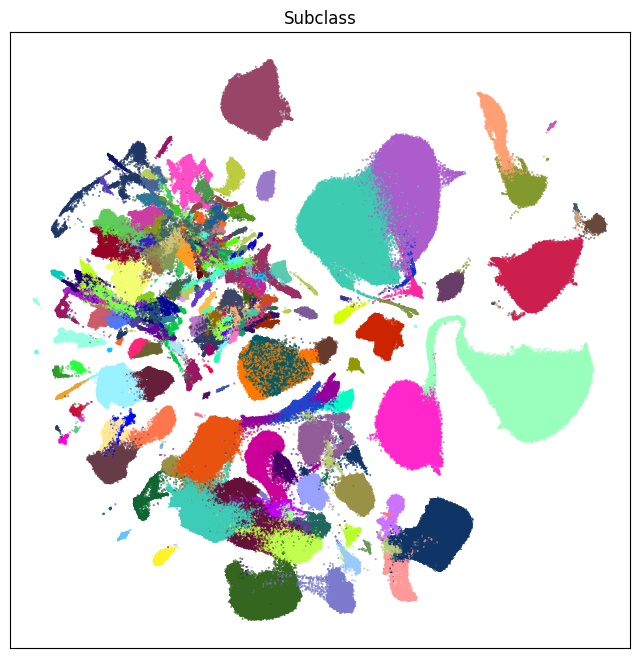

In [18]:
fig, ax = plot_umap(cell_extended['x'], cell_extended['y'], cc=cell_extended['subclass_color'])
res = ax.set_title("Subclass")
plt.show()

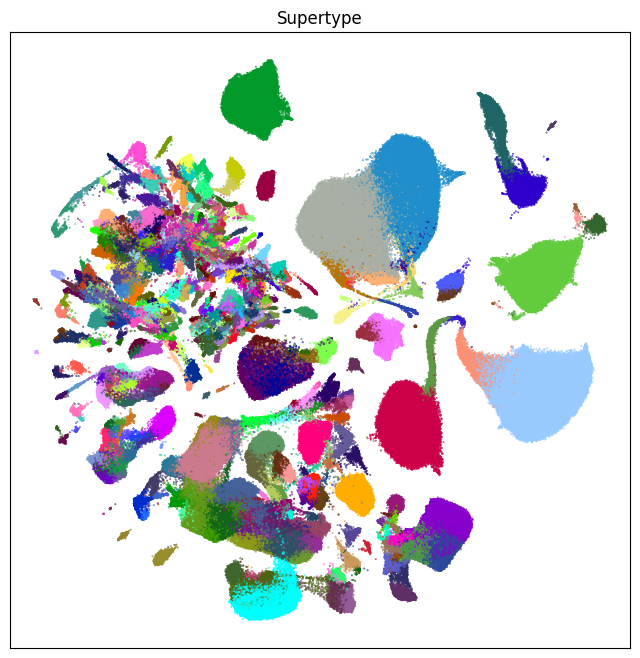

In [19]:
fig, ax = plot_umap(cell_extended['x'], cell_extended['y'], cc=cell_extended['supertype_color'])
res = ax.set_title("Supertype")
plt.show()

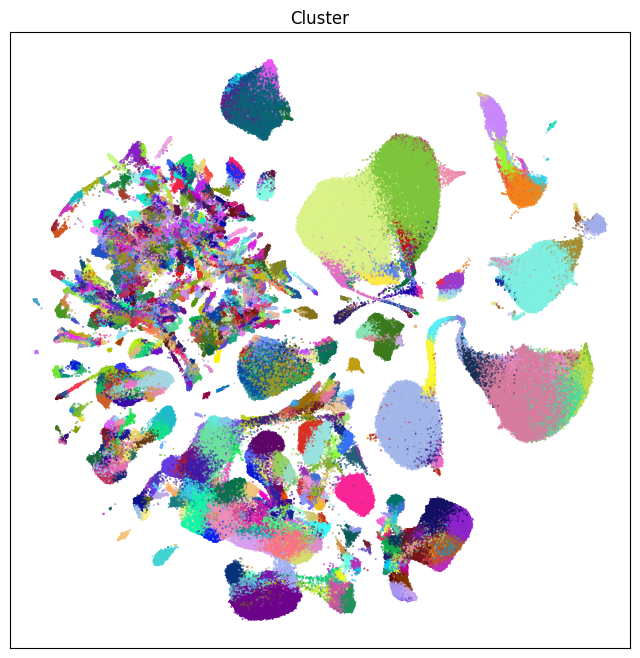

In [20]:
fig, ax = plot_umap(cell_extended['x'], cell_extended['y'], cc=cell_extended['cluster_color'])
res = ax.set_title("Cluster")
plt.show()

### Aging information

Finally, we plot aging related information on our UMAP, showing the different age related variables and they are expressed in different locations of the UMAP. Below we show the location of the cells from the adult and aged mice.

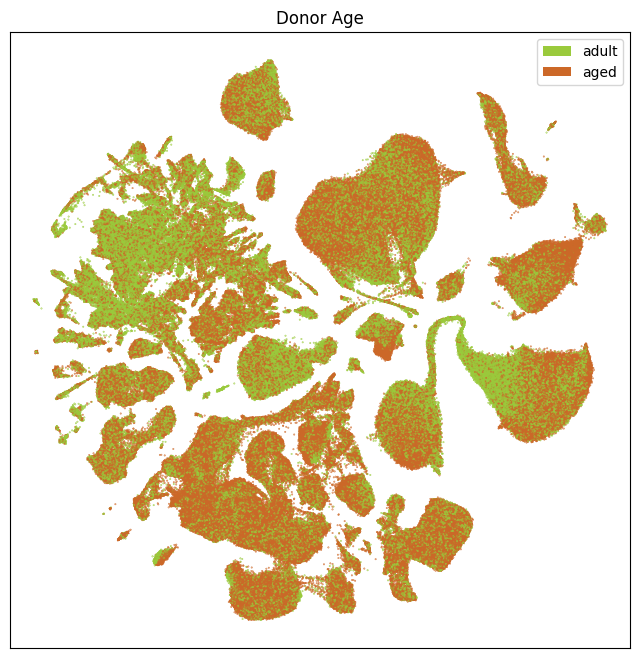

In [21]:
fig, ax = plot_umap(
    cell_extended['x'],
    cell_extended['y'],
    cc=cell_extended['donor_age_category_color'],
    labels=cell_extended['donor_age_category'].unique()
)
res = ax.set_title("Donor Age")
plt.show()

Next we show the log of the cluster level odds ratio for a given cluster to be age enriched (brown) or depleted (blue-green).

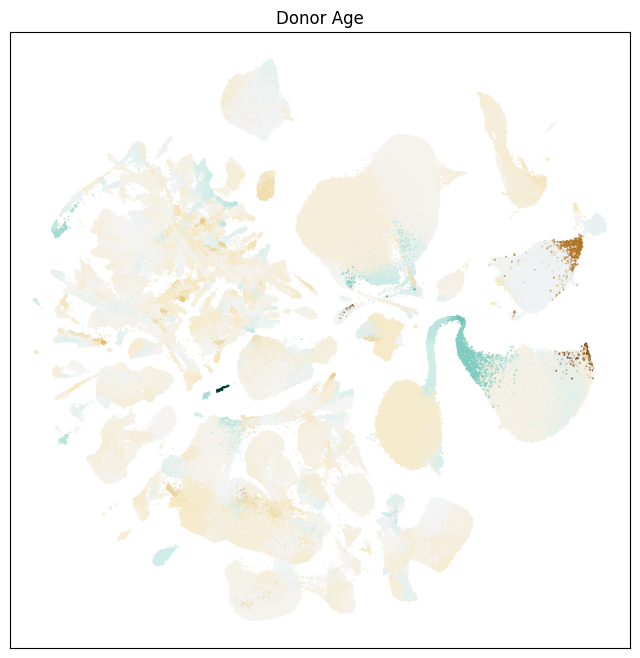

In [26]:
fig, ax = plot_umap(
    cell_extended['x'],
    cell_extended['y'],
    val=cell_extended['log2_odds_ratio'],
    cmap='BrBG_r'
)
res = ax.set_title("Donor Age")
plt.show()

Finally, how show the clusters that are identified as aging-enriched and aging-depleted based on their odds ratio. (-2.5 > log2_odds_ratio, log2_odds_ratio > 2.5).

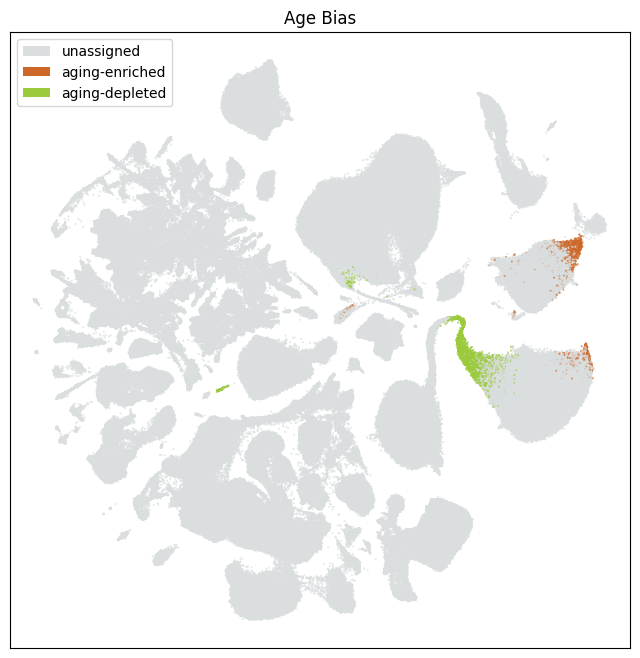

In [25]:
fig, ax = plot_umap(
    cell_extended['x'],
    cell_extended['y'],
    cc=cell_extended['cluster_age_bias_color'],
    labels=cell_extended['cluster_age_bias'].unique()
)
res = ax.set_title("Age Bias")
plt.show()

**In part 2 we'll focus on gene data including using the UMAP to plot gene expression locations as well as age Differential (ageDE) genes identified in Zeng et al.**